In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import math
from scipy.stats import binom, poisson, geom, norm, expon  # distribution  
from scipy.stats import shapiro, normaltest, levene, kruskal  # nArmality test
import statsmodels.api as sm                                  # qqplot
from scipy.stats import pearsonr, spearmanr, chi2_contingency   # correlAtion test
from statsmodels.tsa.stattools import adfuller, kpss # stAstanary test
from statsmodels.stats.weightstats import ztest  #num hypothesis testing
from scipy.stats import ttest_ind, ttest_rel, f_oneway, chi2   # parametric hypothisis testing

In [2]:
data = pd.read_csv("fake_job_postings_dataset.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


1. <b>Here we will be giving job description so that we can find which job is accurate and which are all fake jobs so that the user can easily identify and can apply to the actual jobs and truthful jobs that are being posted  we use basic EDA For this job description project</b>

1. May be here some of the columns are object d type and some of the columns are in 64 type so which means we have only 2 categories so that are object that is string and integer respectively

1. job ID is similar to serial number so we don't have any big kind of impact on this

1. title is something very intrusive and location also maybe department and salary range in most cases we see that salary range this not a number and then we have company profile description and requirement and benefits which are of a big strings mostly they need a very large regular expression kind of thing to detailed analysis 

1. company profile with is literally telling about the companies background and description is telling about the job description so which you will be working on and the requirement is which are all the basic things that you need to get a job so baby this 3 columns are very more important

1. And then we come back with benefits telecommunication company logo so basically company logo doesn't play any important role here has questions even though doesn't comes enough very good manner 

1. employee type may be so we have here a categorical kind of data and then required experience it is also some kind of categorical data required education is housework categorical data industry and function that comes under a kind of string kind of thing so we have variety of unique values here in resultant fault tolerant

1. so here we are about to find which kind of description matches or that is in queue commonly there in all the fault tolerance true that is 1 so if fraudulent is zero which means job descriptions is true and if it is one it is false so that that specific job description is said to be false so in this case we need to find out the relationship between all the false job descriptions may be and then which are all the factors that are influencing which adding an advantage to become an fraudulent job

1. <b>So for supporting this will be running some kind of hypothesis testing maybe correlation or independent test for dependency test between fraudulent and with mainly on employment type required experience required education industry function salary range title department and location so which are all like very much dependent on like with both each other so we will call we can create and come to a conclusion</b>

1. <b>and from company profile description and requirement so these are basically string kind of things so we need enough TK so the higher end to analyse this with a relation of fraudulent but that is being more higher now so will do basic regular expression d on which are all the common terms that are mainly found in fraudulent cases</b>

In [3]:
df0 = data.copy()
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

- So we have some null values here may be we need to take care of all the columns we have about 18 columns in which 7 columns that have all the values present in it and remaining 10 columns as many missing values so that has to be taking care very carefully!

In [4]:
df0.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


- Here for fraudulent jobs been need to find some similarities with them so that such things that doesn't exist r exist very less in normal job descriptions so here first we will be separating as a first priority that is fraudulent message and non fraudulent messages and then we will compare it's location department salary range and some of its key components

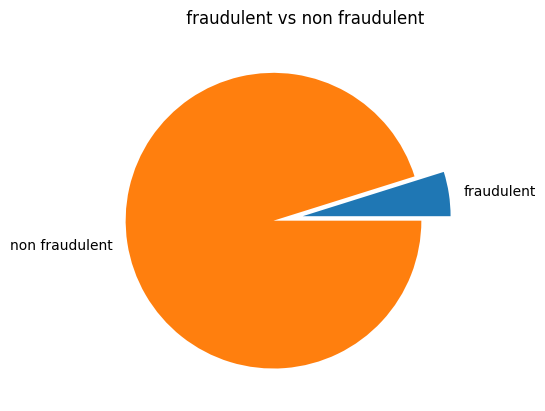

In [5]:
df_f = df0[df0['fraudulent'] == 1]  #fraudulent
df_nf = df0[df0['fraudulent'] == 0]  # non fraudulent

plt.title(' fraudulent vs non fraudulent')
plt.pie([df_f.shape[0], df_nf.shape[0]], 
        labels=['fraudulent', 'non fraudulent'], 
        explode=(0, 0.2))
plt.show()

## <U>1. Null values Fixing</u>

In [24]:
df0.isnull().sum().sort_values(ascending= False)

salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

In [23]:
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
department             64
required_education     45
benefits               40
required_experience    39
function               36
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

1. We will start with fixing the null values here so here we have location value basically location v caught to wait in a better way so better to drop all the 300 rows and for department I could see that like some of the job titles does not have any specific departments so for the all the remaining null values we will give a department called unknown

1. and for salary range and there are about only 3000 rows that are there but most of the salary rows are empty so which means salaries are not specified so maybe we can give that not specified which is level zero of salary range I could see the salary ranges of object type maybe this can be in a categorical data so which means law salary range or unknown salary range that we are about to fix it will be zero and then the above and low salary is of 1 and the mid salary 2 and then high salary 3 something like that

1. it is better to draw those those which does not have any company profile description and requirements benefits because we can't add company descriptions specify it so better to drop it in this case

1. In employee sahib there are only I think full time part time other so it is better to have this nan values to be other And record experience also to be not applicable

1. In some cases I could see that required education s null but basically for every job description at least we need a bachelor's degree that is a basic thing so we will fill all this null values with bachelor's degree the very basic

1. Industries and functions it is also something very irrespective TO particular industries so we can't fill this out so will remove this course which are all having it


- <b>Basically I have a doubt here which is if some columns are empty the key requirement columns are empty then which we can also save card these job descriptions can be fraudulent so that what we will do is the data which we have separated F, NF we apply drop na to both of these data so that we can see how many datas are been dropped in how many percentage let's say if it is a fraudulent data set and has a size of about 800 in which 500 roads are Mt so that which we can say that with the probability of 60% if the rows are empty then it is friedland</b>


In [6]:
print('before drop', df_f.shape)
df0_f = df_f.dropna(subset=['title','company_profile','description','requirements','employment_type','required_experience','required_education','industry','function'])
print('after drop', df0_f.shape)

before drop (866, 18)
after drop (197, 18)


- <b>I dropped the non important columns so that these columns are mandatory for a job description basically so if we dont have these columns so we are assuming that start job description will be false so out of 866 we have only 197 rows reminding which means 22% or non fraudulent which means this concert works with an efficiency of 77.25 percentage if we dont have values in these particular columns we can say that pictures of redolent job description with the percentage of 77.25</b>


In [7]:
print('before drop', df_nf.shape)
df0_nf = df_nf.dropna(subset=['title','company_profile','description','requirements','employment_type','required_experience','required_education','industry','function'])
print('after drop', df0_nf.shape)

before drop (17014, 18)
after drop (5971, 18)


- <b>And for non fraudulent even the same condition applies so in here we can see that if we dont have when use in these columns it is said to be non-fraudulent jobs with the efficiency of 64.9 percentage</b><br><br>
- <b>if its a fraudulent given that we have atleast one null value that is 77.25 percentag <br> if its a Non fraudulent given that we have atleast one null value that is 64.9 percentage</b>

- <b>In this case we have many null values basically some rules have vast number of null values so there are only 2 outputs will be considering here either will be filling all the null values so that which can also lead in false prediction and even if we drop all those null values it shrinks all the data set from 17,000 to 3000 maybe so which is very hard to predict which are which cannot be more accurate and result so we need a particular column to be taken care more specifically whether in that values can be dropped or can be filled.</b>

- For this let us consider which are all the columns are high priority requirement columns and which columns that does not impact on results so we will split the data with only columns which are mostly required

- Important columns are title, department, company profile, description, requirement, employment type, required experience, industry and function so from this if we take out the data and then we will drop columns which are null then we will remind with the least number of rows in this column so department has 6333 rows so maybe we will remind end up with a data set having 6300 rose which is literally 40% of data restart the case then we will even drop the department column so that we can have maybe 10,000 rows

#### A. Fixing null values for salary_range